In [1]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/petfinder-pawpularity-score/sample_submission.csv
/kaggle/input/petfinder-pawpularity-score/train.csv
/kaggle/input/petfinder-pawpularity-score/test.csv
/kaggle/input/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
/kaggle/input/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg
/kaggle/input/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg
/kaggle/input/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg
/kaggle/input/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg
/kaggle/input/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg
/kaggle/input/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg
/kaggle/input/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg
/kaggle/input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg
/kaggle/input/petfinder-pawpularity-score/train/2969162fab1d0e5a65e4ce02db26

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
import tensorflow as tf



test_data = pd.read_csv("../input/petfinder-pawpularity-score/test.csv").to_numpy()
train_data = pd.read_csv("../input/petfinder-pawpularity-score/train.csv").to_numpy()

TEST_PATH = '../input/petfinder-pawpularity-score/test'
TRAIN_PATH = '../input/petfinder-pawpularity-score/train'

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization

In [4]:
tabular_train_data_path = '../input/petfinder-pawpularity-score/train.csv'
tabular_test_data_path = '../input/petfinder-pawpularity-score/test.csv'
base_path = '../input/petfinder-pawpularity-score'

In [5]:
train_df = pd.read_csv(tabular_train_data_path)
train_df.describe()


,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [6]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import warnings
warnings.filterwarnings("ignore")

In [8]:
train_df.isna().sum()

Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64

In [9]:
train_df['path'] = base_path + '/train/' + train_df['Id'] + '.jpg'

train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,../input/petfinder-pawpularity-score/train/000...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,../input/petfinder-pawpularity-score/train/000...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,../input/petfinder-pawpularity-score/train/001...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,../input/petfinder-pawpularity-score/train/001...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,../input/petfinder-pawpularity-score/train/001...


In [10]:
table_input = train_df.iloc[:, 1:-2]
table_input.head(2)

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0,1,1,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0


In [11]:
target = train_df.iloc[:, -2]
target.head(2)

0    63
1    42
Name: Pawpularity, dtype: int64

In [12]:
train_dir = base_path + '/train/'
IMG_SIZE = (224, 224)
train_images = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                   image_size=IMG_SIZE,
                                                                   labels=None,
                                                                   label_mode=None,
                                                                   batch_size=64,
                                                                   shuffle=False)

Found 9912 files belonging to 1 classes.


2021-11-22 18:53:07.746223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 18:53:07.858292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 18:53:07.859135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 18:53:07.861877: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
AUTO = tf.data.AUTOTUNE

In [14]:
def preprocess_train(image):
    image = tf.image.random_flip_left_right(image)
    image = image / 255.0
    return image

In [15]:
base_path = '../input/petfinder-pawpularity-score'

In [16]:

train_img_data = train_images.map(preprocess_train, num_parallel_calls=AUTO)
train_img_data = train_img_data.prefetch(AUTO)

2021-11-22 18:53:10.909547: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


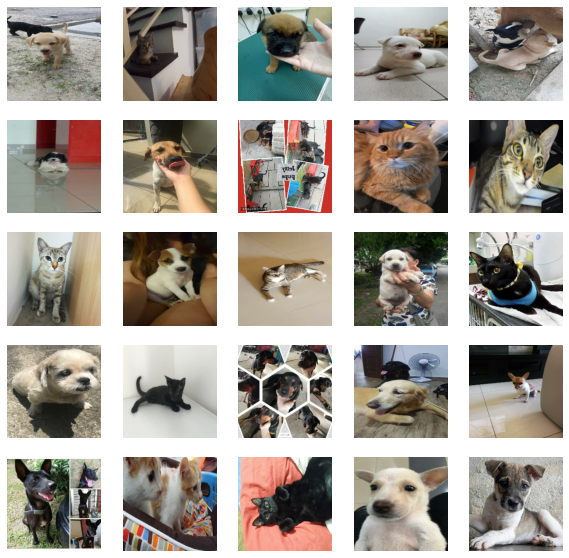

In [17]:
image_batch = next(iter(train_img_data))

plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.axis("off");

In [18]:
for image in train_img_data.take(1):
    print("Image Size: ", image.shape)
    print("Image max val: ", tf.reduce_max(image))
    print("Image min val: ", tf.reduce_min(image))
    break

Image Size:  (64, 224, 224, 3)
Image max val:  tf.Tensor(1.0, shape=(), dtype=float32)
Image min val:  tf.Tensor(0.0, shape=(), dtype=float32)


In [19]:


model1 = Sequential([
    
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Dense(512),
    Flatten(),
    Dense(units=1,activation='softmax'),
])
img_inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='img_input')
model1 = model1(img_inputs)
img_outputs = tf.keras.layers.Dense(512, activation='relu')(model1)
img_model = tf.keras.Model(img_inputs, img_outputs)
img_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 1)                 1632673   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1024      
Total params: 1,633,697
Trainable params: 1,633,697
Non-trainable params: 0
_________________________________________________________________


In [20]:
tabular_inputs = tf.keras.layers.Input(shape=(12, ), name='tabular_input')
fc1 = tf.keras.layers.Dense(16, activation='relu')(tabular_inputs) 
fc2 = tf.keras.layers.Dense(32, activation='relu')(fc1)
fc3 = tf.keras.layers.Dense(32, activation='relu')(fc2)
tabular_outputs = tf.keras.layers.Dense(512)(fc3)
tabular_model = tf.keras.Model(tabular_inputs, tabular_outputs)
tabular_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tabular_input (InputLayer)   [(None, 12)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 512)               16896     
Total params: 18,704
Trainable params: 18,704
Non-trainable params: 0
_________________________________________________________________


In [21]:
concat_models = tf.keras.layers.Concatenate(axis=1)([img_model.output, tabular_model.output])
output = tf.keras.layers.Dense(1, activation='linear')(concat_models)

model = tf.keras.Model(inputs=[img_inputs, tabular_inputs], outputs=output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tabular_input (InputLayer)      [(None, 12)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16)           208         tabular_input[0][0]              
__________________________________________________________________________________________________
img_input (InputLayer)          [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 32)           544         dense_3[0][0]                    
____________________________________________________________________________________________

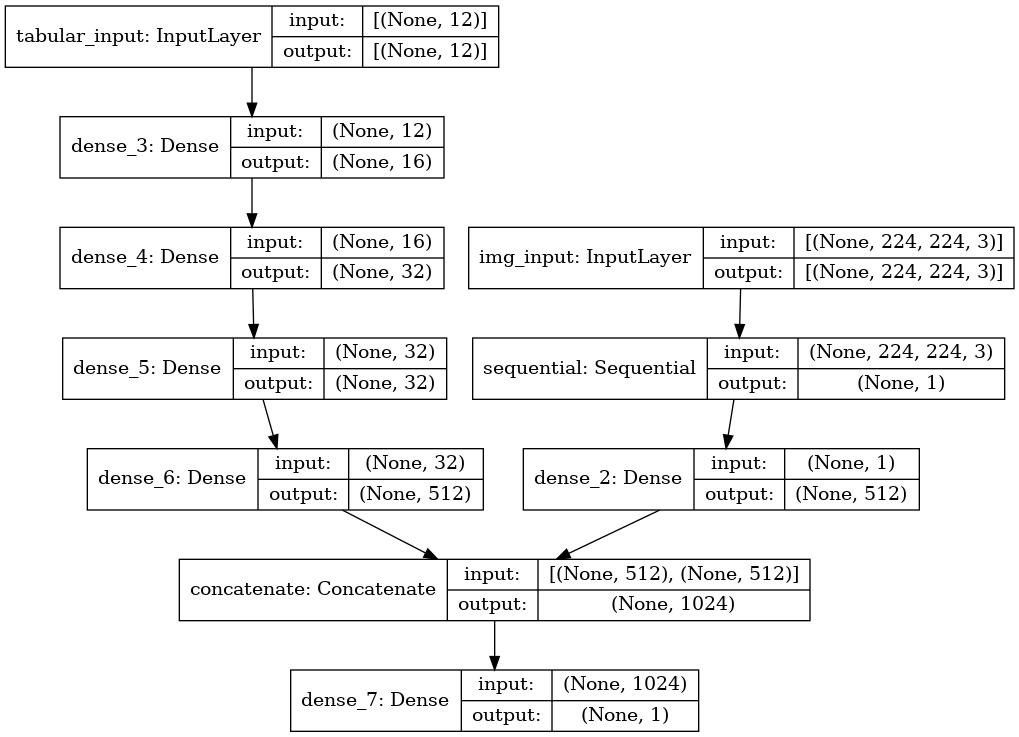

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
table_input.shape, target.shape

((9912, 12), (9912,))

In [24]:
table_input_data = tf.data.Dataset.from_tensor_slices(table_input)
table_target_data = tf.data.Dataset.from_tensor_slices(target)

In [25]:
table_ex_data = table_input_data.batch(64).prefetch(AUTO)

In [26]:
table_target_ex = table_target_data.batch(64).prefetch(AUTO)

In [27]:
table_target_ex

<PrefetchDataset shapes: (None,), types: tf.int64>

In [28]:
train_input_data = tf.data.Dataset.zip((train_img_data, table_ex_data))
train_data = tf.data.Dataset.zip((train_input_data, table_target_ex))

In [29]:
train_data

<ZipDataset shapes: (((None, 224, 224, 3), (None, 12)), (None,)), types: ((tf.float32, tf.int64), tf.int64)>

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

In [31]:
history = model.fit(train_data,
                   epochs=10)

Epoch 1/10


2021-11-22 18:53:19.646763: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


155/155 [==============================] - 64s 368ms/step - loss: 733.8955 - rmse: 27.0905
Epoch 2/10
155/155 [==============================] - 46s 293ms/step - loss: 431.1601 - rmse: 20.7644
Epoch 3/10
155/155 [==============================] - 45s 290ms/step - loss: 427.5423 - rmse: 20.6771
Epoch 4/10
155/155 [==============================] - 45s 292ms/step - loss: 426.2741 - rmse: 20.6464
Epoch 5/10
155/155 [==============================] - 45s 286ms/step - loss: 425.5863 - rmse: 20.6297
Epoch 6/10
155/155 [==============================] - 45s 287ms/step - loss: 425.0507 - rmse: 20.6168
Epoch 7/10
155/155 [==============================] - 46s 294ms/step - loss: 424.6804 - rmse: 20.6078
Epoch 8/10
155/155 [==============================] - 45s 289ms/step - loss: 424.3394 - rmse: 20.5995
Epoch 9/10
155/155 [==============================] - 46s 293ms/step - loss: 424.1146 - rmse: 20.5940
Epoch 10/10
155/155 [==============================] - 45s 288ms/step - loss: 423.9022 - rmse

In [32]:
test_df = pd.read_csv(tabular_test_data_path)
test_df.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [33]:
test_dir = base_path + '/test/'

test_images = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=IMG_SIZE,
                                                                   labels=None,
                                                                   label_mode=None,
                                                                   batch_size=1,
                                                                   shuffle=False)

Found 8 files belonging to 1 classes.


In [34]:
test_input = test_df.iloc[:, 1:]

test_input.head(10)

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,1,0,1,0,0,1,1,0,0,1,0,1
1,0,1,0,0,0,0,1,1,0,0,0,0
2,0,0,0,1,0,1,1,1,0,1,1,1
3,1,0,1,0,0,0,0,0,0,0,1,0
4,1,1,1,0,1,1,0,1,0,1,1,0
5,0,0,1,1,1,1,1,1,1,0,1,0
6,1,0,0,0,1,1,0,1,0,1,1,1
7,1,0,1,0,0,0,0,0,1,0,0,1


In [35]:
test_input = test_input.to_numpy()

In [36]:
test_input[0]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [37]:
test_input_data = tf.data.Dataset.from_tensor_slices(test_input).batch(1).prefetch(AUTO)

test_data = tf.data.Dataset.zip((test_images, test_input_data))

test_data

<ZipDataset shapes: ((None, 224, 224, 3), (None, 12)), types: (tf.float32, tf.int64)>

In [38]:
img = test_dir + test_df['Id'][0] + '.jpg'

img

'../input/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg'

In [39]:
def preprocess_test(image):
    image = tf.io.read_file(image)
    image = tf.io.decode_image(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image

In [40]:
image0 = preprocess_test(img)
tf.expand_dims(image0, axis=0).shape

TensorShape([1, 224, 224, 3])

In [41]:
y_pred = model.predict((tf.expand_dims(image0, axis=0), tf.expand_dims(test_input[0], axis=0)))

In [42]:
y_pred

array([[38.3423]], dtype=float32)

In [43]:
y_pred[0].item()

38.34230041503906

In [44]:
# model.save('./pawpularity.mlp')

In [45]:
Pawpularity = []
for i in range(len(test_df)):
    img = test_dir + test_df['Id'][i] + '.jpg'
    image = preprocess_test(img)
    y_pred = model.predict((tf.expand_dims(image, axis=0), tf.expand_dims(test_input[i], axis=0)))
    
    Pawpularity.append(y_pred[0].item())
    
Pawpularity

[38.34230041503906,
 33.85396194458008,
 37.74592590332031,
 32.75349426269531,
 38.75865936279297,
 42.54170227050781,
 31.575822830200195,
 37.47441864013672]

In [46]:
sub = {
    'id' : test_df.Id,
    'Pawpularity' : Pawpularity
}

sub_df = pd.DataFrame(sub)
sub_df

,id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,38.342300
1,43a2262d7738e3d420d453815151079e,33.853962
2,4e429cead1848a298432a0acad014c9d,37.745926
3,80bc3ccafcc51b66303c2c263aa38486,32.753494
4,8f49844c382931444e68dffbe20228f4,38.758659
5,b03f7041962238a7c9d6537e22f9b017,42.541702
6,c978013571258ed6d4637f6e8cc9d6a3,31.575823
7,e0de453c1bffc20c22b072b34b54e50f,37.474419


In [47]:
sub_df.to_csv('submission.csv', index=False)